In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from scipy.optimize import curve_fit

### Leer el archivo con la frecuencias y la masa respectivas

In [2]:
f = open("freq_masas.txt","r")
freq_masas = []
for line in f:
    line_text = line.split(",")
    freq_masas.append([float(line_text[0]),int(line_text[1])])
f.close()

### Función de la ecuación teórica
Sea<br>
k: constante de proporcionalidad<br>
m: masa en gramos

$freq(m) = \frac{1}{2}\sqrt{\frac{k}{m*10^{-3}}}$


In [3]:
def ecuacion_teorica(m,k=499):
    m = m * (10 ** (-3))
    freq = (1 / (2*np.pi)) * np.sqrt(k / m)
    return freq

### Función de la función fit
Sea
m: masa en gramos<br>
a: constante<br>
Usamos una función irracional para describir el modelo<br>

$f(m)=\frac{1}{a \sqrt{m}}$

In [4]:
def fit(m,a):
    m = m * (10 ** (-3))
    return 1/(np.sqrt(m)*a)

Almacenando los valores de las frecuencias y masas en sus listas respectivas.

In [5]:
x = []
y = []

for frecuencia in freq_masas:
    y.append(frecuencia[0])
for masa in freq_masas:
    x.append(masa[1])

popt almacena los valores de los parámetros obtenidos por curve_fit

In [6]:
popt, _ = curve_fit(fit, x, y, bounds=(0,np.inf))
a = popt

## Gráfica

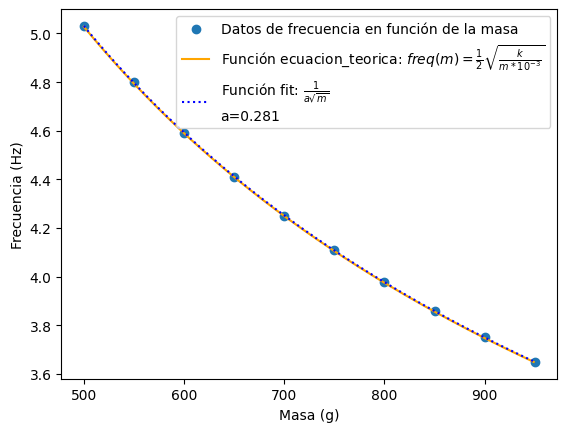

In [7]:
plt.scatter(x,y, label="Datos de frecuencia en función de la masa")

x_line_fit = arange(min(x),max(x),1)
x_line_frec = arange(min(x),max(x),1)

y_line_fit = fit(x_line_fit,a)
y_line_frec = ecuacion_teorica(x_line_frec)

plt.plot(x_line_frec, y_line_frec, '-', color='orange', label="Función ecuacion_teorica: " + r"$freq(m) = \frac{1}{2}\sqrt{\frac{k}{m*10^{-3}}}$")
plt.plot(x_line_fit, y_line_fit, ':', color='blue', label="Función fit: " + r"$\frac{1}{a \sqrt{m}}$" + "\n" + "a=%5.3f" % tuple(popt))

plt.xlabel('Masa (g)')
plt.ylabel('Frecuencia (Hz)')
plt.legend()
plt.savefig("Relacion_FreqMasa.png")
plt.show()